In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
math_df= pd.read_csv('/content/student-mat.csv', sep=";")
por_df = pd.read_csv("/content/student-por.csv", sep=";")


Merge the datasets

In [ ]:
merged_df = pd.merge(math_df, por_df, on=["school", "sex", "age", "address", "famsize", "Pstatus",
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"])
print(merged_df.shape)

(382, 53)


EDA

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [ ]:
merged_df.describe()

,age,Medu,Fedu,traveltime_x,studytime_x,failures_x,famrel_x,freetime_x,goout_x,Dalc_x,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,...,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,...,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
merged_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Drop Duplicates

In [ ]:
#Dropping all _y columns i.e portugese data
columns_to_drop = [col for col in merged_df.columns if col.endswith("_y")]
merged_df= merged_df.drop(columns=columns_to_drop)

# renaming _x to original names
merged_df.columns = [col.replace("_x",'') for col in merged_df.columns]

In [ ]:
merged_df.shape

(382, 33)

In [ ]:
merged_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
merged_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

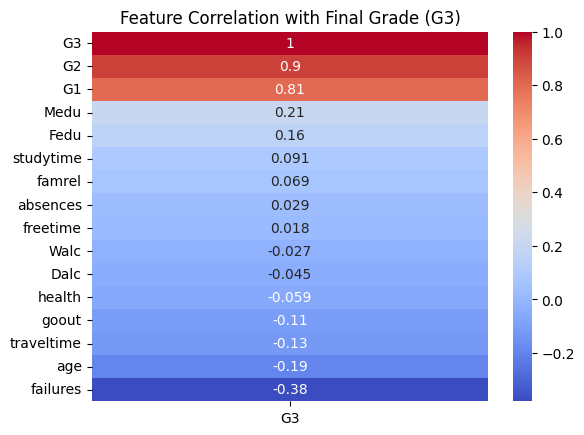

In [ ]:
# correlation with the target- G3_x (Math grade) as the target

corr = merged_df.corr(numeric_only=True)
sns.heatmap(corr[['G3']].sort_values(by='G3' , ascending =False), annot=True , cmap='coolwarm') # G3 - final grade (numeric: from 0 to 20, output target)
plt.title("Feature Correlation with Final Grade (G3)")
plt.show()

Encoding the Categorical Variables - This will convert sex, school, internet, etc. into binary columns the model can use.

In [ ]:
df_encoded =pd.get_dummies(merged_df, drop_first= True)

Define Features(X) and Target(y)

In [ ]:
X= df_encoded.drop(columns=["G3"])
y= df_encoded["G3"]

Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

**Model Training**

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

EVALUATE THE MODELS

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate(y_true, y_pred, model_name):
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_dt, "Decision Tree")

Linear Regression - MAE: 1.44, RMSE: 2.17
Decision Tree - MAE: 0.89, RMSE: 1.44


Feature importance from Decision Tree

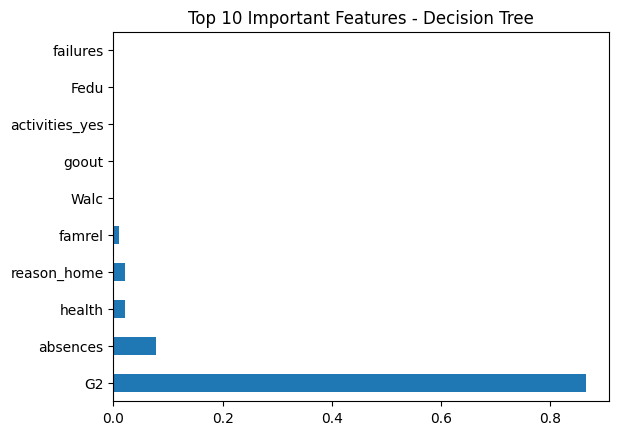

In [ ]:
importance = pd.Series(dt.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Decision Tree")
plt.show()

Dropping G1 and G2 and testing

In [ ]:
X_filtered = df_encoded.drop(columns=["G1", "G2", "G3"])
y_filtered = df_encoded["G3"]


2️⃣ Train-test split


In [ ]:
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

Retrain the models



In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Re evaluate

In [ ]:
evaluate(y_test, y_pred_lr, "Linear Regression (No G1/G2)")
evaluate(y_test, y_pred_dt, "Decision Tree (No G1/G2)")

Linear Regression (No G1/G2) - MAE: 5.09, RMSE: 6.68
Decision Tree (No G1/G2) - MAE: 3.86, RMSE: 5.16


RANDOM FOREST REGRESSOR WITHOUT G1 & G2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
evaluate(y_test, y_pred_rf, "Random Forest(No G1/G2)")

Random Forest(No G1/G2) - MAE: 3.38, RMSE: 4.44


Feature Importance

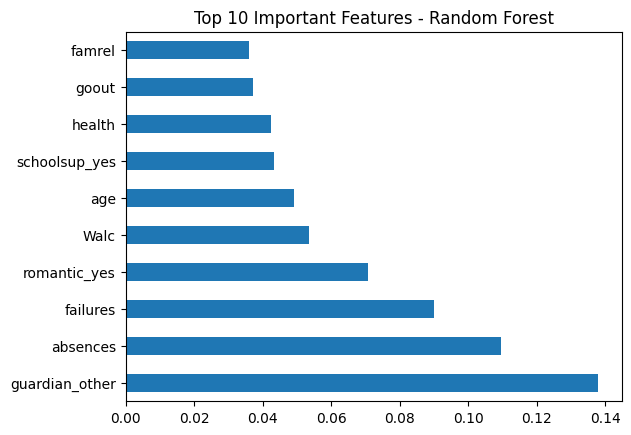

In [ ]:
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

Random Forest performs better than the other 2 models

Hyperparameter Tuning with GridSearchCV on Random Forest

In [ ]:
#Defining the parameter Grid
#Building a "menu" of different model versions for GridSearchCV to test.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators':[50, 100, 150],
    'max_depth' : [5,10,15],
    'min_samples_split': [2,5,10]
}

In [ ]:
#Initialize GridSerachCV-
#This tells GridSearch:
#"Try all 27 models, evaluate them using 5-fold cross-validation, and pick the one with the lowest MAE."


rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5, #5 fold cross validation
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)


In [ ]:
# Fit the model on training data

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
# Best Model Evaluation

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

evaluate(y_test, y_pred_best, "Tuned Random Forest")

Tuned Random Forest - MAE: 3.39, RMSE: 4.40


In [ ]:
print("Best Prameters Found:", grid_search.best_params_)

Best Prameters Found: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 150}


Visualize Hyperparameter Tuning Results

In [ ]:
#Converting GridSearchCV results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values(by="mean_test_score", ascending=False)

In [ ]:
#Note: The score is negative MAE (since scikit-learn minimizes it), so you may want to convert it back:

results_df["mean_MAE"] = -results_df["mean_test_score"]

Top Results

In [ ]:
results_df[[
    "param_n_estimators",
    "param_max_depth",
    "param_min_samples_split",
    "mean_MAE",
    "rank_test_score"
]].head(10)

,param_n_estimators,param_max_depth,param_min_samples_split,mean_MAE,rank_test_score
2,150,5,2,3.263846,1
5,150,5,5,3.288597,2
1,100,5,2,3.295191,3
11,150,10,2,3.295854,4
23,150,15,5,3.301249,5
14,150,10,5,3.302399,6
20,150,15,2,3.308422,7
0,50,5,2,3.310143,8
8,150,5,10,3.311759,9
10,100,10,2,3.314397,10


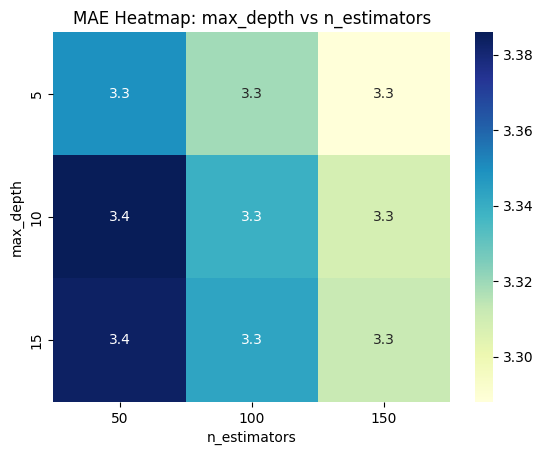

In [ ]:
heatmap_data = results_df.pivot_table(
    values='mean_MAE',
    index='param_max_depth',
    columns='param_n_estimators'
)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu")
plt.title("MAE Heatmap: max_depth vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.show()


FEATURE IMPORTANCE PLOT

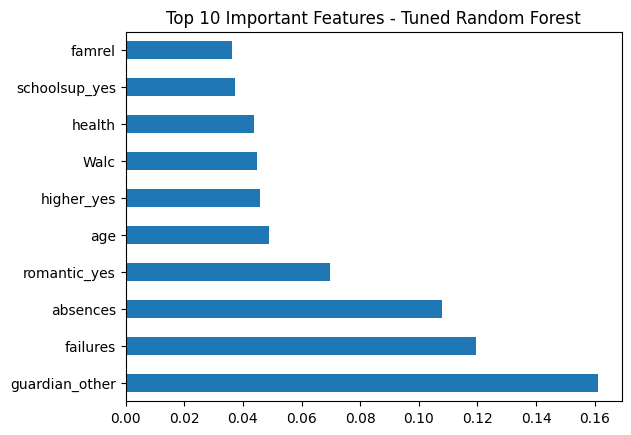

In [ ]:
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Tuned Random Forest")
plt.show()

Final Observations

G2 and G1 are highly predictive — makes sense because they're prior grades

Without G1/G2, Random Forest still does a decent job with demographic and behavioral data

Features like failures, absences, studytime, romantic, and schoolsup still matter

In [ ]:
#Save the model

import joblib
joblib.dump(best_rf, "student_grade_model.pkl")


['student_grade_model.pkl']

Implementing XGBoost Regressor

In [ ]:
!pip install xgboost

In [ ]:
# Import and Train the model

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predicting and evaluating

y_pred_xgb = xgb.predict(X_test)
evaluate(y_test, y_pred_xgb, "XGBoost")

XGBoost - MAE: 3.62, RMSE: 4.69


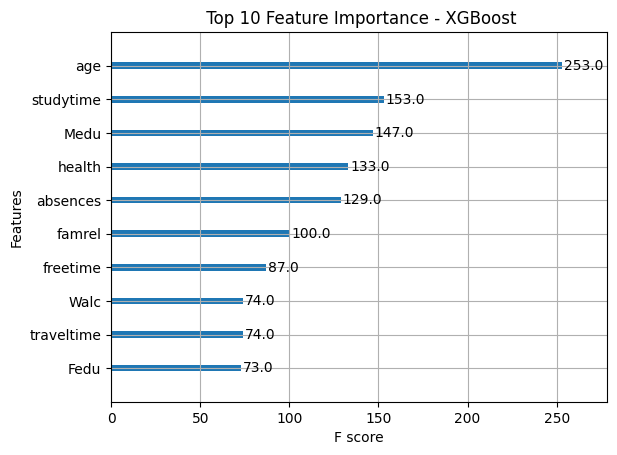

In [ ]:
#Feature Importance

import xgboost as xgb_vis

xgb_vis.plot_importance(xgb, max_num_features=10)
plt.title(" Top 10 Feature Importance - XGBoost")
plt.show()

Note: XGBoost's F score counts how many times a feature was used in the trees, not the impact of that feature. That’s why it’s good to follow up with SHAP, which we’ll do next.

**SHAP (SHapley Additive exPlanations)**

Using SHAP to:

Understand overall feature impact (global)

Explain individual student predictions (local)


In [ ]:
!pip install shap

In [ ]:
#import SHAP and initialize Explainer

import shap
#Initialize TreeExplainer for XGBoost model
explainer = shap.Explainer(xgb)

In [ ]:
#Compute SHAP Values

shap_values = explainer(X_test)

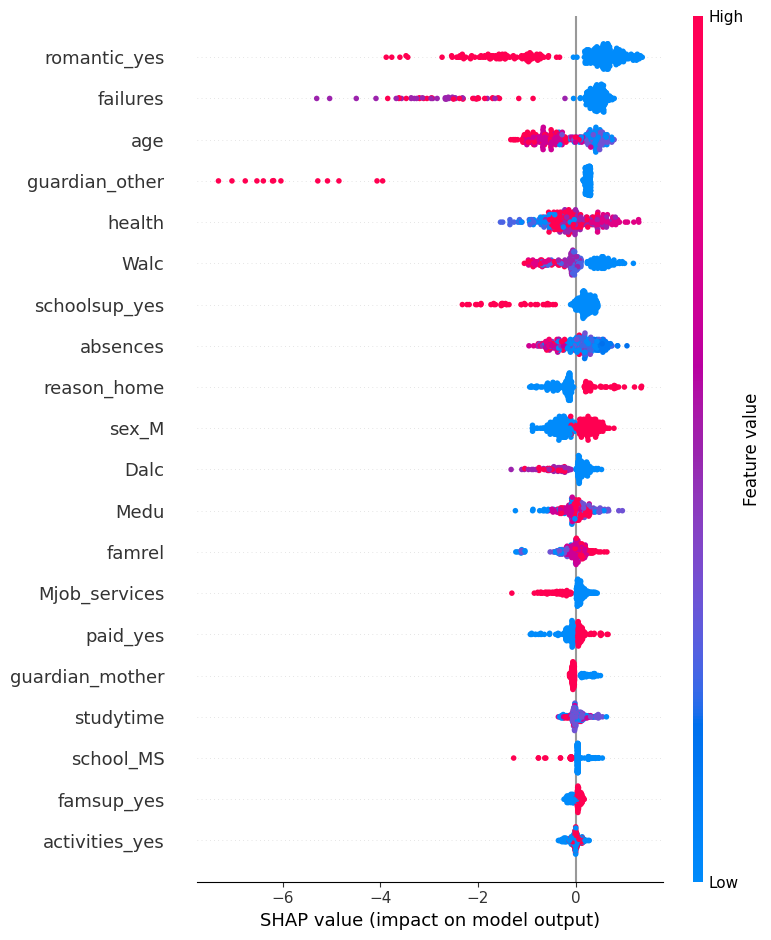

In [ ]:
# Visualizations
#A. Summary Plot (Global Importance)-Shows which features are most important across all predictions

shap.summary_plot(shap_values, X_test)

Horizontal Position (X-axis):
Each dot is a student.

Right (positive SHAP value) = pushes predicted grade up

Left (negative SHAP value) = pushes predicted grade down

This plot tells you which features the model is relying on, and how it’s using them

e.g.- The red dot for failures is far left:

That means a student with many past failures is pulling the prediction downward (from 14 → 10)

A blue dot for schoolsup_yes far right:

That means a student without school support might be doing unexpectedly well.

The model is most influenced by failures, relationships, age, and absences

In [ ]:
import shap
shap.initjs()


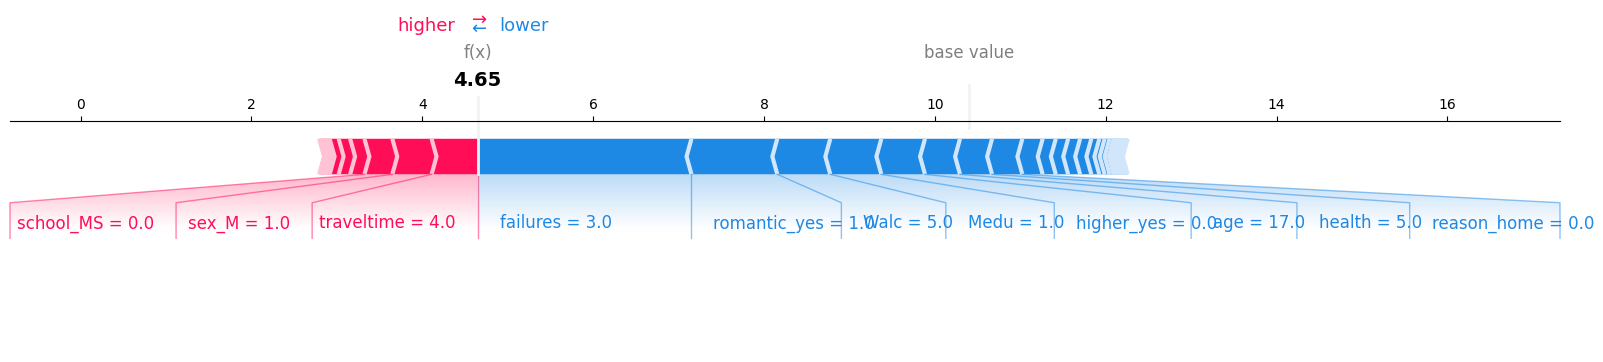

In [ ]:
# B. Force Plot (Single Prediction)

student_index = 0
shap.force_plot(explainer.expected_value,
                shap_values[student_index].values,
                X_test.iloc[student_index],
                matplotlib=True)


 A SHAP Force Plot is a powerful visual for understanding an individual prediction.

Gray line (middle)	The model’s baseline prediction (average prediction across all students)

Red arrows (left)	Features that pushed the grade higher

Blue arrows (right)	Features that pushed the grade lower

Final score (bold)	f(x) = 4.65 = the student’s predicted grade

school_MS = 0	Attends GP school (not MS) → slightly positive effect

sex_M = 1	Male → added a small positive nudge

traveltime = 4.0	Long commute → surprisingly added slightly (depends on patterns in data)

failures = 3	 Strong negative impact on grade prediction

romantic_yes = 1	Student is in a relationship → lowers predicted grade

Walc = 5.0	High weekend alcohol use → negative impact

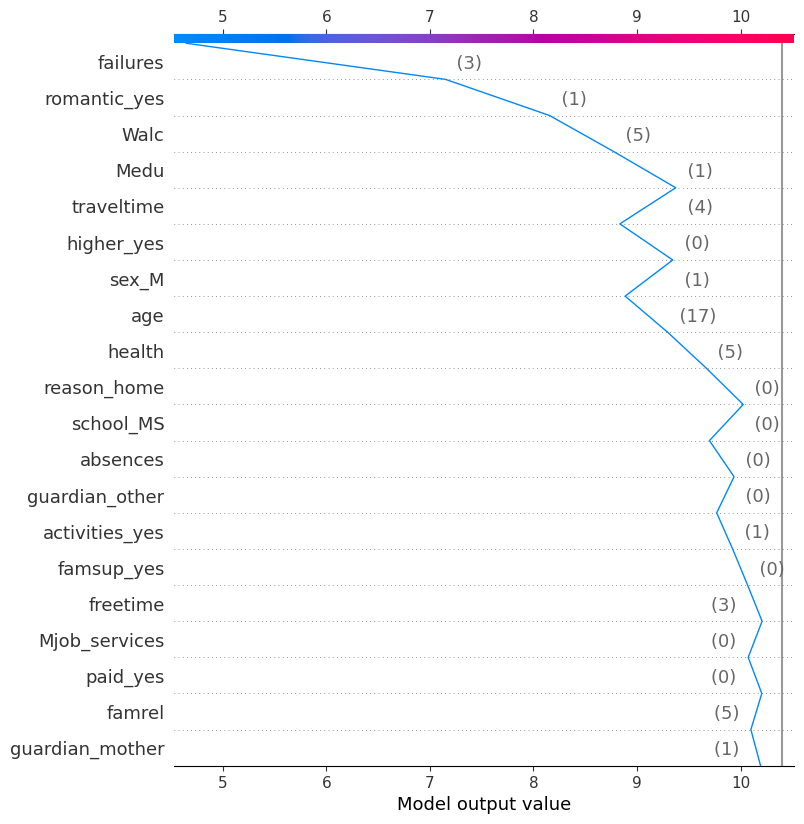

In [ ]:
#SHAP Decision Plot
shap.decision_plot(
    explainer.expected_value,          # base value
    shap_values[student_index].values, # SHAP values (1D array)
    X_test.iloc[student_index]         # feature values for that student
)


**This plot shows how each feature change the model’s prediction for this student**


Breakdown of the Plot

X-axis: Model Output Value (Predicted Grade)
Starts near the baseline prediction (around ~10)

Each step moves left or right based on the effect of a feature

Y-axis: Features (in order of influence)
The most influential features are at the top

The path shows how the prediction was adjusted from the baseline

Key features that lowered the prediction:

Feature	Value	Effect
failures = 3	: Strongest negative effect

romantic_yes = 1	: Lowered the prediction slightly

Walc = 5	: High alcohol on weekends — big negative push

Medu = 1	Low maternal education — also reduced predicted grade

The line keeps dropping left — meaning these features collectively pulled the predicted grade down.